In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

Statsmodels

In [2]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

Fuente de datos API Yahoo finance

In [3]:
import yfinance as yf

In [4]:
df_yfinance = yf.download(
    auto_adjust=True,
    tickers='^GSPC',
    interval='1d',
    group_by='ticker',
    start='1994-01-07')

[*********************100%***********************]  1 of 1 completed


In [5]:
df_yfinance.head()

,Open,High,Low,Close,Volume
Date,,,,,
1994-01-07,467.089996,470.260010,467.029999,469.899994,324920000
1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000
1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000
1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000
1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000


In [6]:
df_yfinance_raw = df_yfinance.copy()

In [7]:
df_yfinance['spx'] = df_yfinance['Close']

In [8]:
df_yfinance

,Open,High,Low,Close,Volume,spx
Date,,,,,,
1994-01-07,467.089996,470.260010,467.029999,469.899994,324920000,469.899994
1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000,475.269989
1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000,474.130005
1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000,474.170013
1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000,472.470001
...,...,...,...,...,...,...
2024-08-30,5612.740234,5651.370117,5581.790039,5648.399902,4185850000,5648.399902
2024-09-03,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5528.930176
2024-09-04,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5520.069824


In [9]:
df_yfinance = df_yfinance.asfreq('b')

In [10]:
df_yfinance.head()

,Open,High,Low,Close,Volume,spx
Date,,,,,,
1994-01-07,467.089996,470.260010,467.029999,469.899994,324920000.0,469.899994
1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000.0,475.269989
1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000.0,474.130005
1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000.0,474.170013
1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000.0,472.470001


In [11]:
df_yfinance = df_yfinance.ffill()

# Airline passengers

In [13]:
df_airline = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)

In [14]:
df_airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
import statsmodels.api as sm

In [16]:
df_macrodata = sm.datasets.macrodata.load_pandas().data

In [17]:
df_macrodata.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [18]:
df_macrodata.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [20]:
df_ventas = pd.read_excel('Datos_clase_1.xlsx', index_col='Fecha', parse_dates=True)

In [21]:
df_ventas.head()

,Ventas
Fecha,
2023-01-01,12900.965726
2023-01-02,14962.847415
2023-01-03,17328.133221
2023-01-04,19080.675831
2023-01-05,16665.614172


Diferenciacion de primner orden

In [22]:
df_ventas['d1a'] = df_ventas['Ventas'].diff(1)

In [23]:
df_ventas.head()

,Ventas,d1a
Fecha,,
2023-01-01,12900.965726,NaN
2023-01-02,14962.847415,2061.881689
2023-01-03,17328.133221,2365.285806
2023-01-04,19080.675831,1752.542610
2023-01-05,16665.614172,-2415.061659


<Axes: title={'center': 'Diferencia de primer orden'}, xlabel='Fecha'>

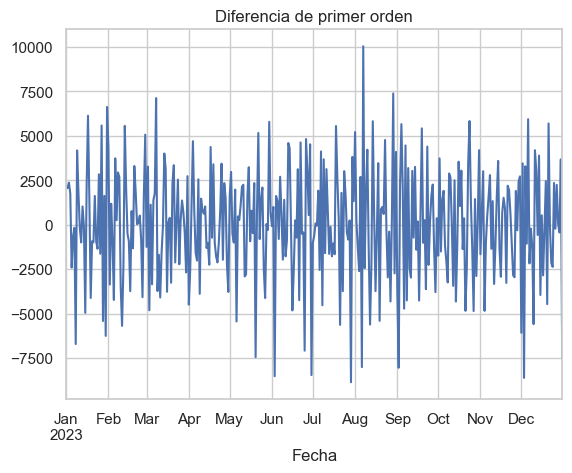

In [24]:
df_ventas['d1a'].plot(title='Diferencia de primer orden')

In [28]:
df_ventas['d2'] = df_ventas['d1a'].diff()

In [33]:
df_ventas.head()

,Ventas,d1a,d2
Fecha,,,
2023-01-01,12900.965726,NaN,NaN
2023-01-02,14962.847415,2061.881689,NaN
2023-01-03,17328.133221,2365.285806,303.404117
2023-01-04,19080.675831,1752.542610,-612.743196
2023-01-05,16665.614172,-2415.061659,-4167.604269


# Ruido blanco

In [34]:
wn = np.random.normal(loc=df_yfinance['spx'].mean(), scale=df_yfinance['spx'].std(), size=len(df_yfinance))
df_yfinance['wn'] = wn

<Axes: title={'center': 'Ruido blanco'}, xlabel='Date'>

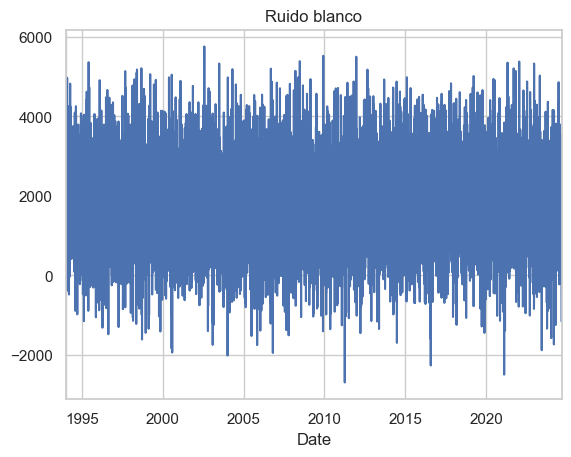

In [35]:
df_yfinance.wn.plot(title='Ruido blanco')

# Caminata aleatoria

In [42]:
steps = np.random.choice([-10, 10], size=len(df_yfinance))

In [43]:
steps[0] = 0

In [44]:
rw = df_yfinance['spx'].mean() + np.cumsum(steps)

In [45]:
df_yfinance['rw'] = rw

<Axes: title={'center': 'Random Walk'}, xlabel='Date'>

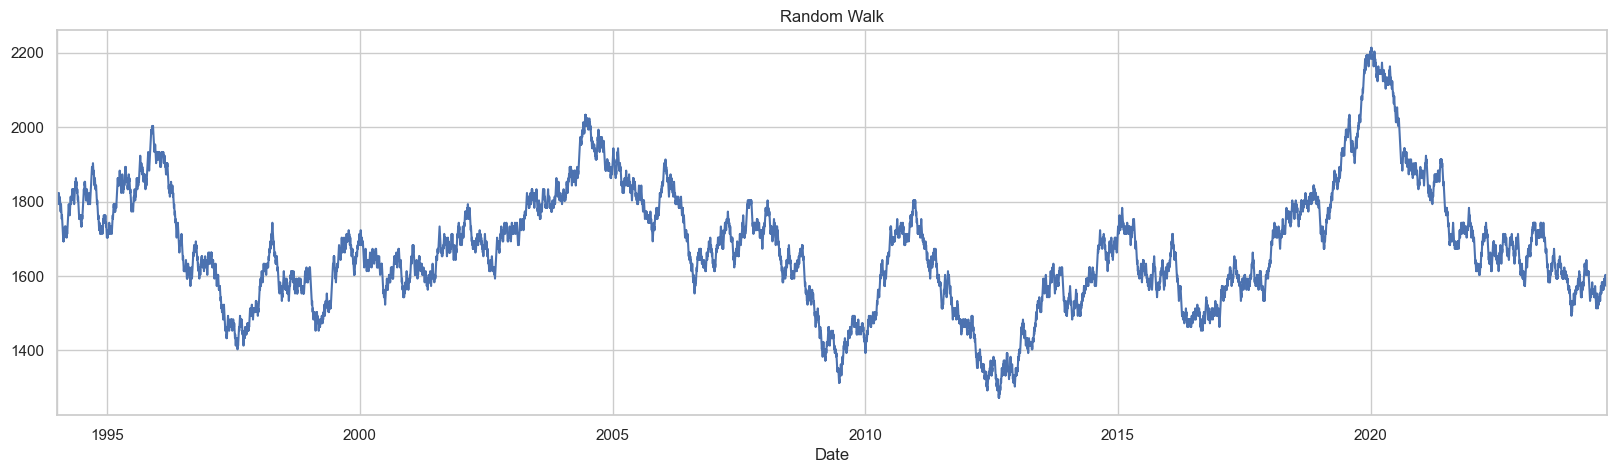

In [46]:
df_yfinance['rw'].plot(title='Random Walk', figsize=(20, 5))

<Axes: title={'center': 'S&P 500 vs Random Walk'}, xlabel='Date'>

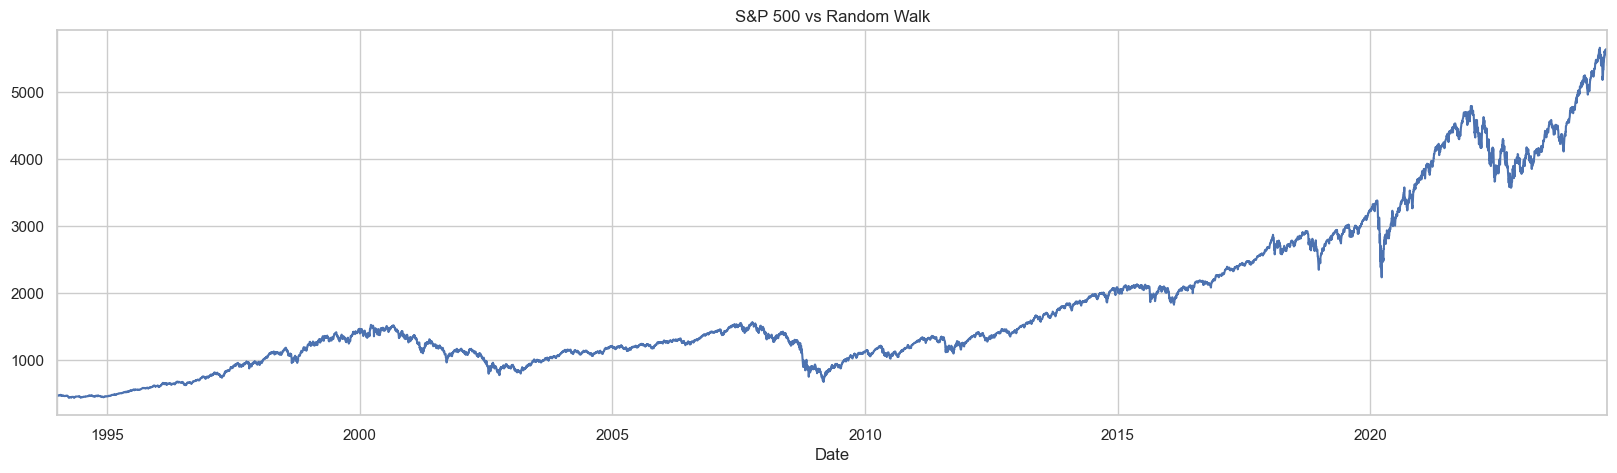

In [47]:
df_yfinance['spx'].plot(figsize=(20, 5), title='S&P 500 vs Random Walk')

<Axes: title={'center': 'S&P 500'}, xlabel='Date'>

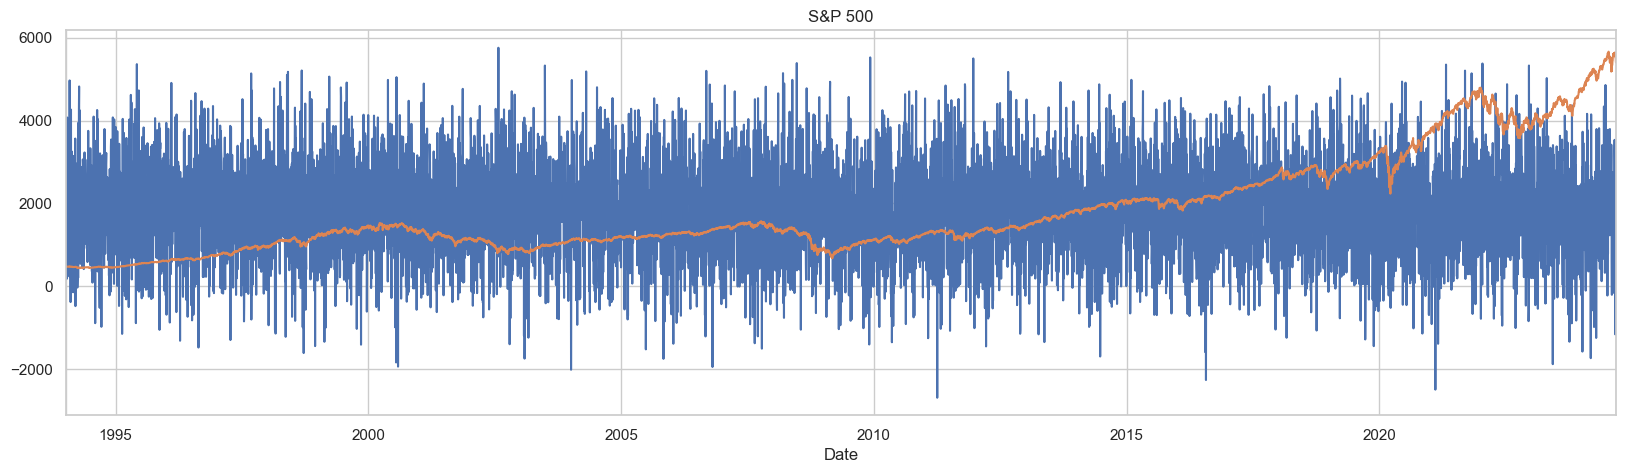

In [48]:
df_yfinance.wn.plot(figsize=(20, 5), title='White Noise')
df_yfinance['spx'].plot(title='S&P 500')

<Axes: title={'center': 'S&P 500'}, xlabel='Date'>

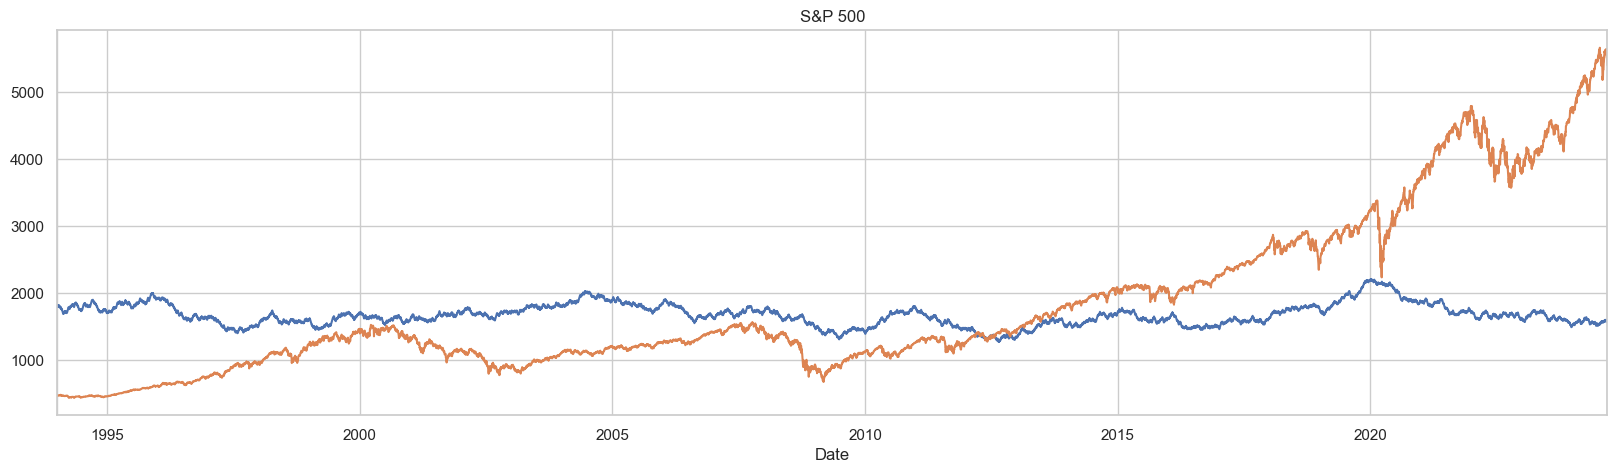

In [50]:
df_yfinance.rw.plot(figsize=(20, 5), title='Random Walk')
df_yfinance['spx'].plot(title='S&P 500')

# Descomposición de Hodrick-Prescott

[Text(0, 0.5, 'PIB EEUU')]

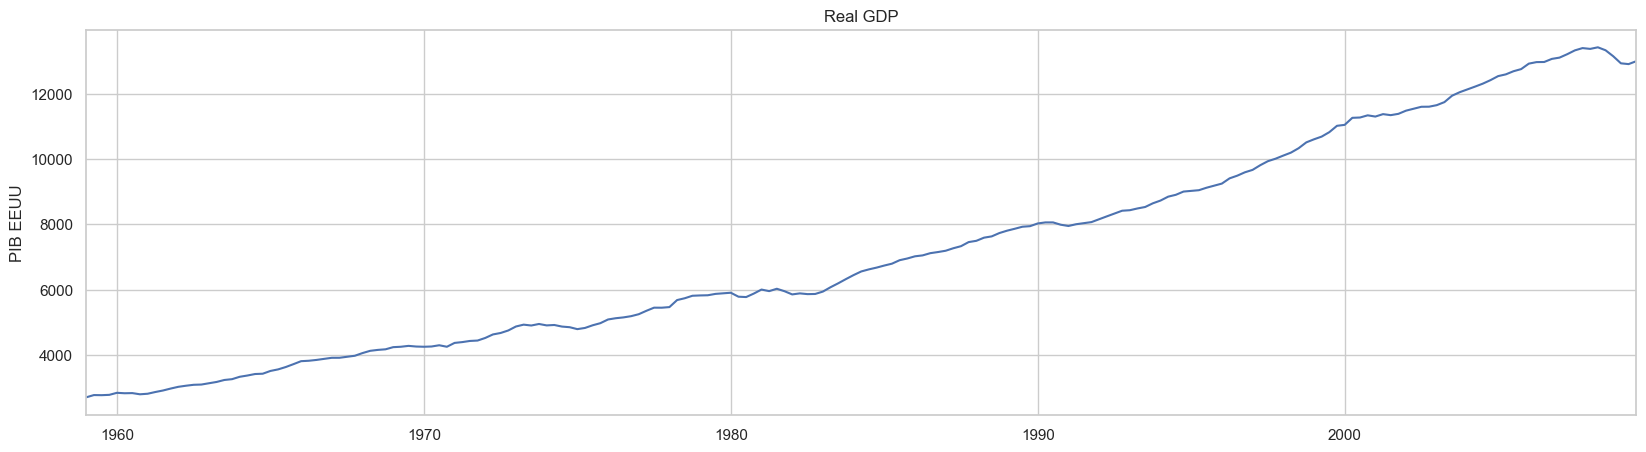

In [52]:
ax = df_macrodata['realgdp'].plot(title='Real GDP', figsize=(20, 5))
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='PIB EEUU')

In [53]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [54]:
gdp_cycle, gdp_trend = hpfilter(df_macrodata['realgdp'], lamb=1600)

In [55]:
spx_cycle, spx_trend = hpfilter(df_yfinance['spx'], lamb=1600)

In [56]:
df_macrodata['trend'] = gdp_trend

In [57]:
df_yfinance['trend'] = spx_trend

<Axes: title={'center': 'Real GDP vs Trend'}>

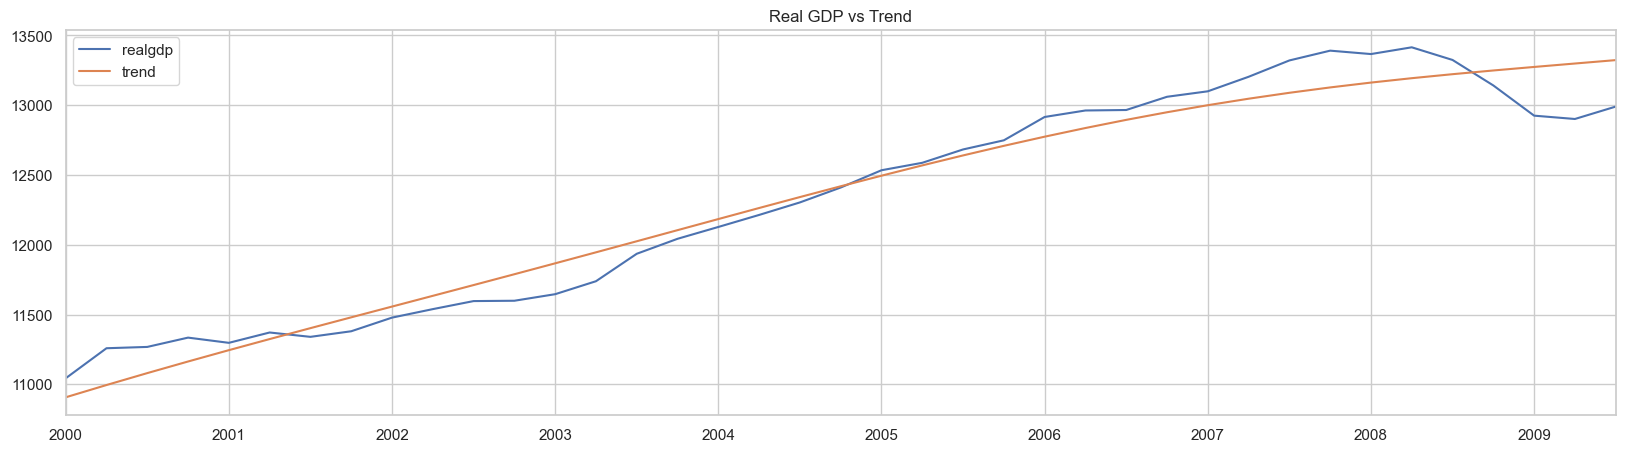

In [60]:
df_macrodata[['realgdp', 'trend']]['2000-03-31':].plot(title='Real GDP vs Trend', figsize=(20, 5))

<Axes: title={'center': 'S&P 500 vs Trend'}, xlabel='Date'>

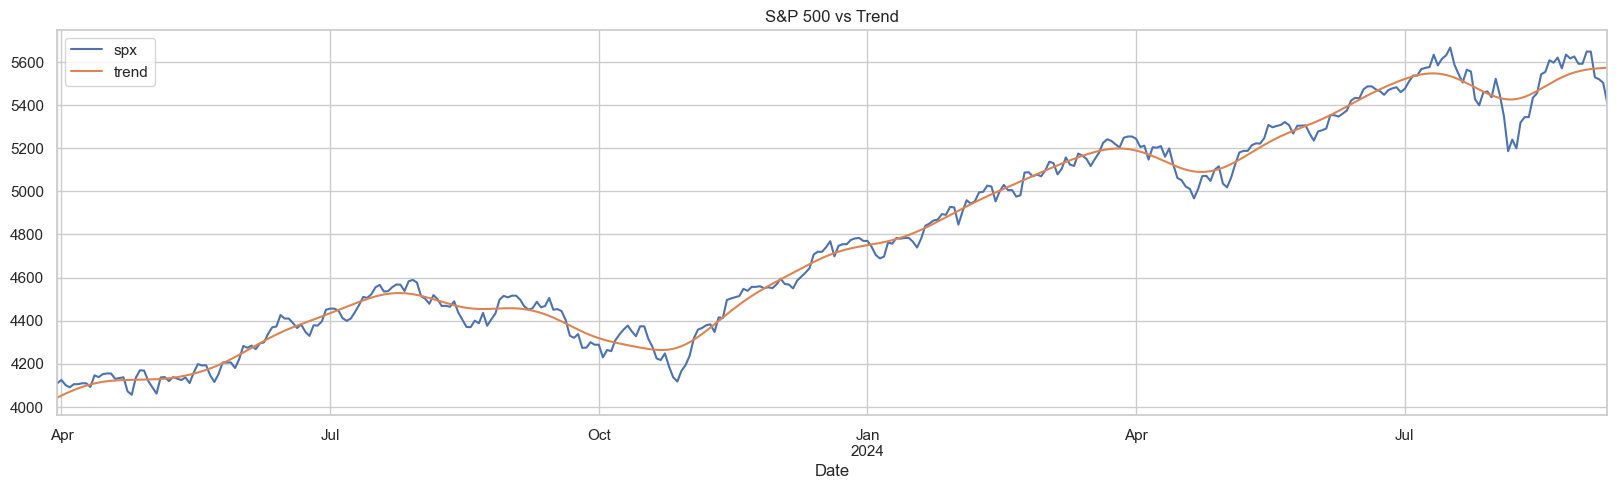

In [63]:
df_yfinance[['spx', 'trend']]['2023-03-31':].plot(title='S&P 500 vs Trend', figsize=(20, 5))

In [65]:
df_macrodata['cycle'] = gdp_cycle

<Axes: title={'center': 'Real GDP vs Trend'}>

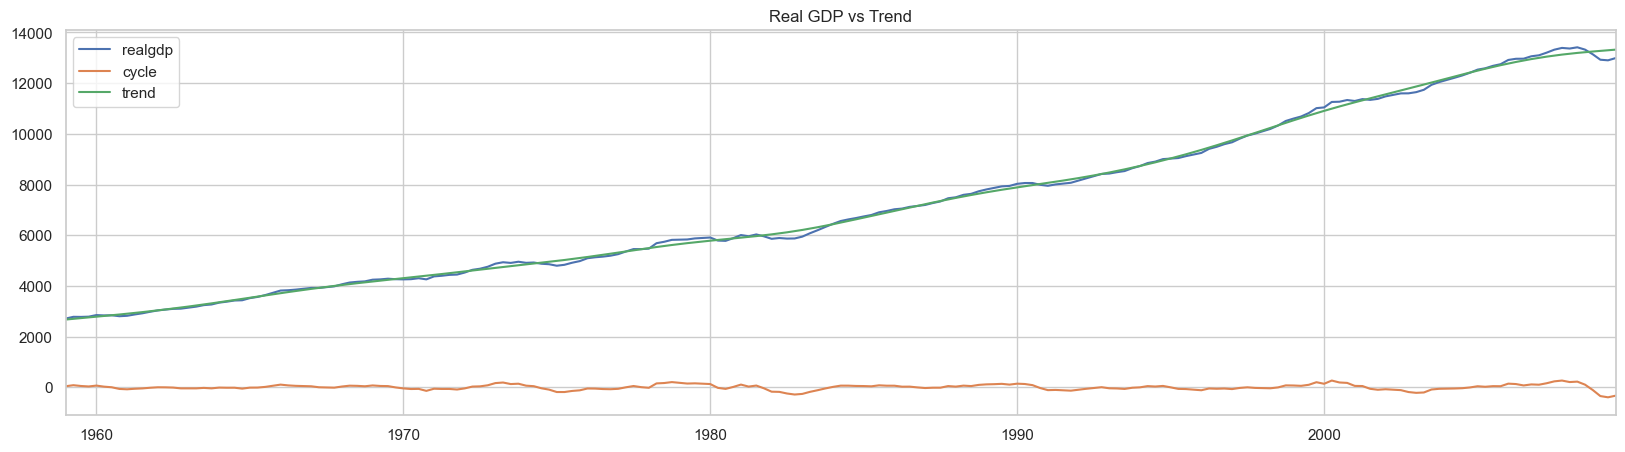

In [67]:
df_macrodata[['realgdp', 'cycle', 'trend']].plot(title='Real GDP vs Trend', figsize=(20, 5))

In [68]:
df_macrodata['cycle'] = gdp_cycle

<Axes: title={'center': 'Real GDP vs Trend'}>

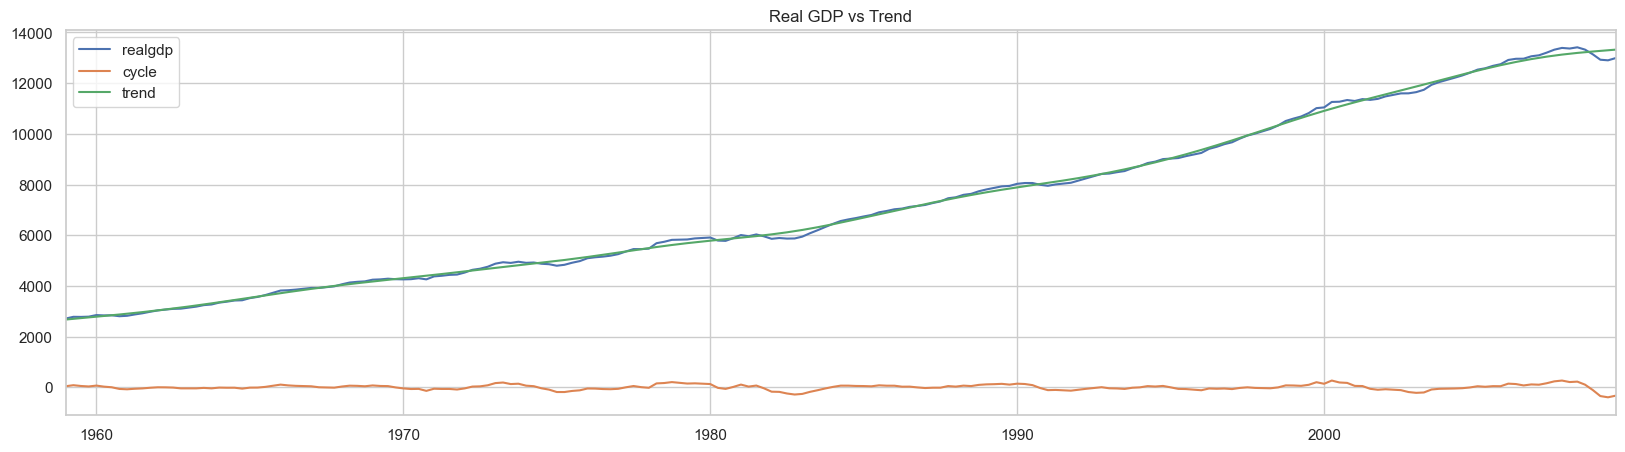

In [69]:
df_macrodata[['realgdp', 'cycle', 'trend']].plot(title='Real GDP vs Trend', figsize=(20, 5))

# ETS

In [71]:
df_airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: title={'center': 'Airline Passengers'}, xlabel='Month'>

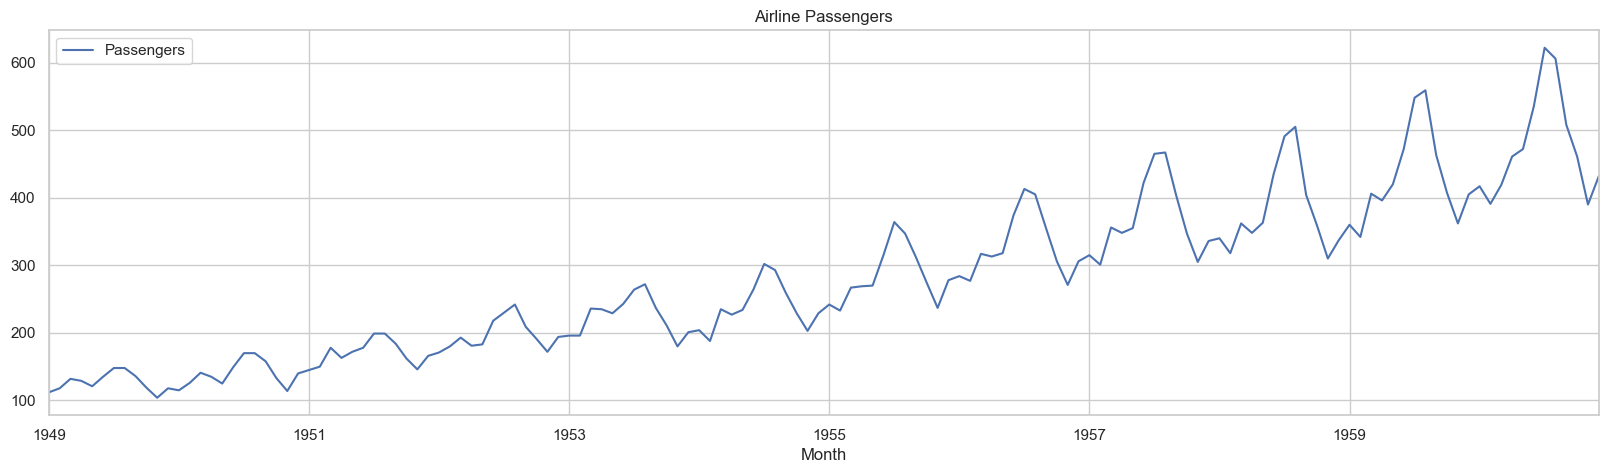

In [70]:
df_airline.plot(title='Airline Passengers', figsize=(20, 5))

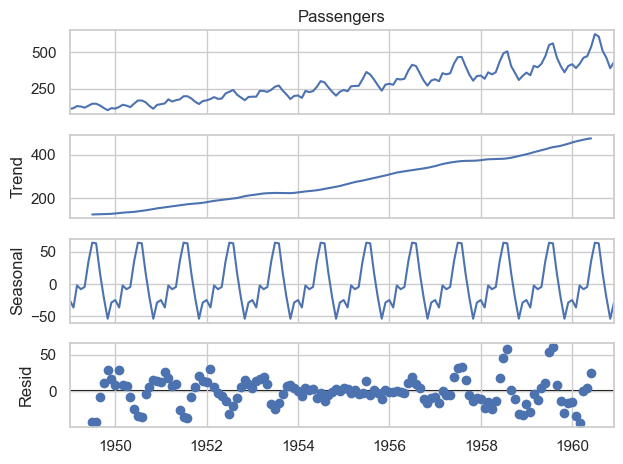

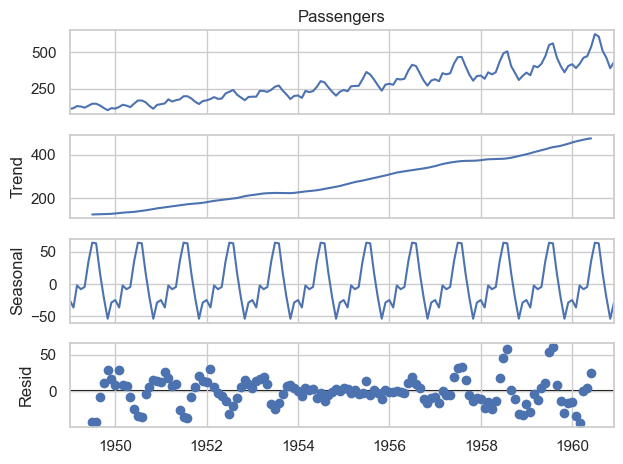

In [72]:
result = seasonal_decompose(df_airline['Passengers'], model='additive')
result.plot()

Filtro

In [76]:
gdp_cycle, gdp_trend = hpfilter(df_airline['Passengers'], lamb=129600)

In [77]:
df_airline['trend'] = gdp_trend
df_airline['cycle'] = gdp_cycle

<Axes: title={'center': 'Airline Passengers vs Trend'}, xlabel='Month'>

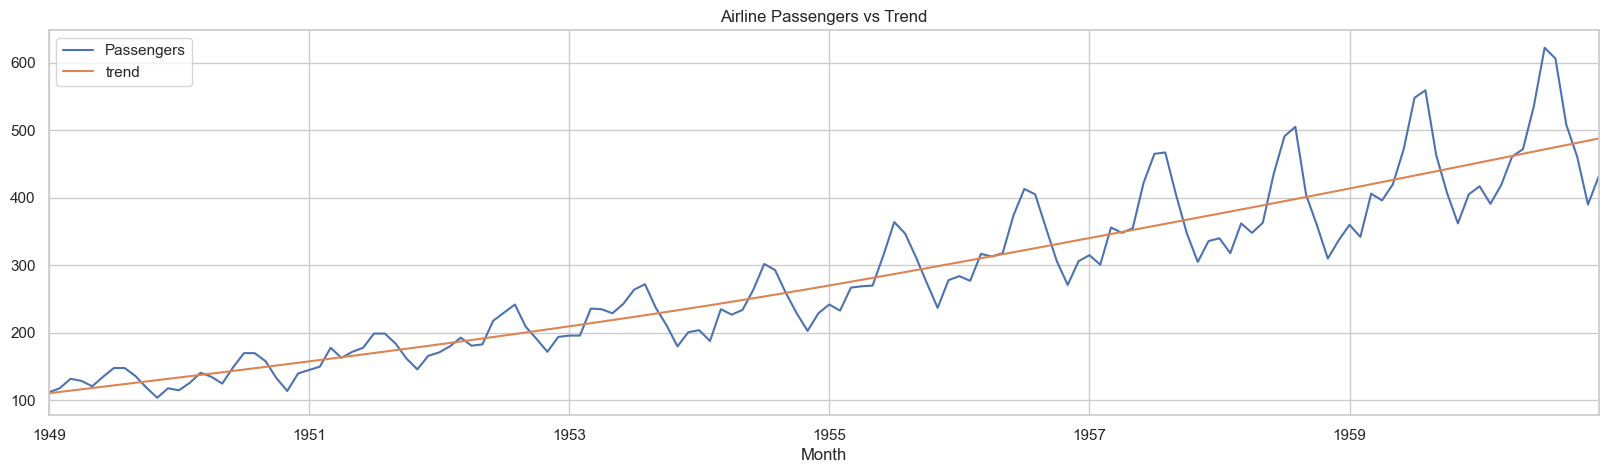

In [78]:
df_airline[['Passengers', 'trend']].plot(title='Airline Passengers vs Trend', figsize=(20, 5))

SMA Simple Movil Average

In [81]:
df_airline['3-month-SMA'] = df_airline['Passengers'].rolling(window=3).mean()
df_airline['6-month-SMA'] = df_airline['Passengers'].rolling(window=6).mean()
df_airline['12-month-SMA'] = df_airline['Passengers'].rolling(window=12).mean()

<Axes: title={'center': 'Airline Passengers vs SMA'}, xlabel='Month'>

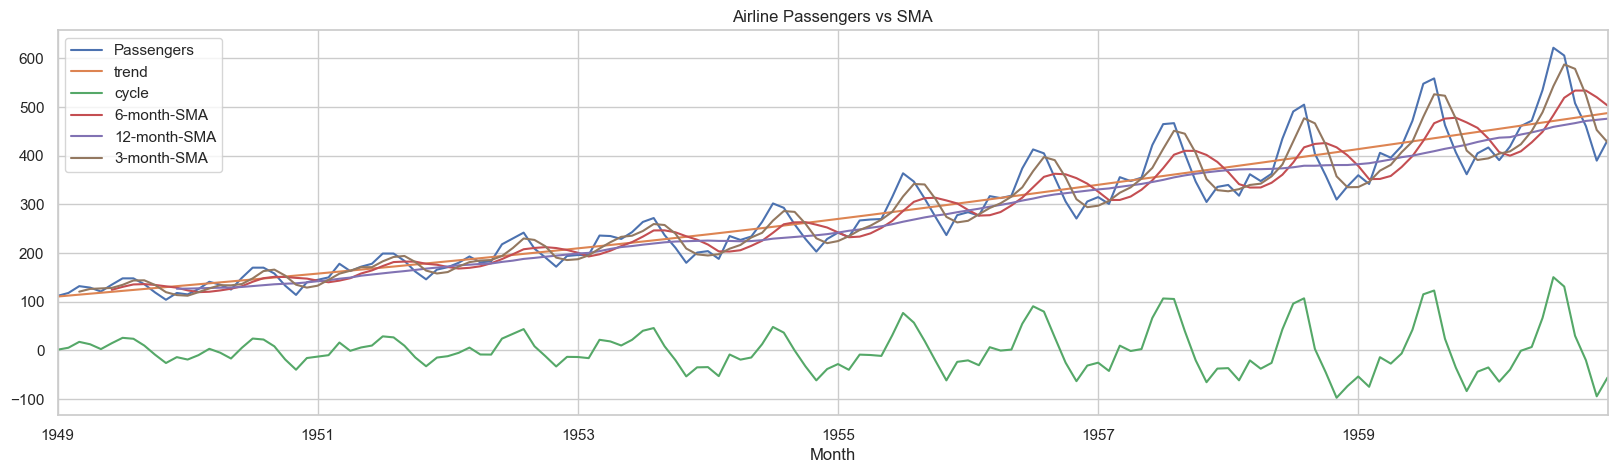

In [82]:
df_airline.plot(title='Airline Passengers vs SMA', figsize=(20, 5))

In [85]:
df_airline['EWMA3'] = df_airline['Passengers'].ewm(span=3, adjust=False).mean()
df_airline['EWMA6'] = df_airline['Passengers'].ewm(span=6, adjust=False).mean()
df_airline['EWMA12'] = df_airline['Passengers'].ewm(span=12, adjust=False).mean()

<Axes: title={'center': 'Airline Passengers vs EWMA'}, xlabel='Month'>

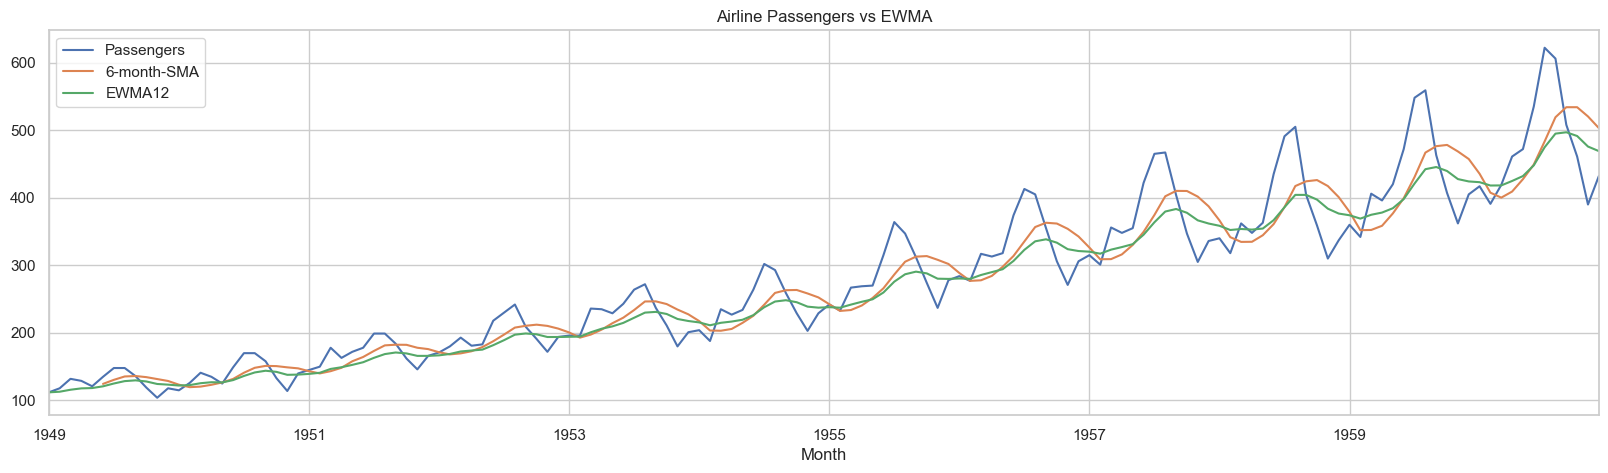

In [92]:
# df_airline[['Passengers', '6-month-SMA', 'EWMA6']].plot(title='Airline Passengers vs EWMA', figsize=(20, 5))
df_airline[['Passengers', '6-month-SMA', 'EWMA12']].plot(title='Airline Passengers vs EWMA', figsize=(20, 5))

In [93]:
df_airline['24-month-SMA'] = df_airline['Passengers'].rolling(window=24).mean()

df_airline['EWMA24'] = df_airline['Passengers'].ewm(span=24, adjust=False).mean()

<Axes: title={'center': 'Airline Passengers vs EWMA'}, xlabel='Month'>

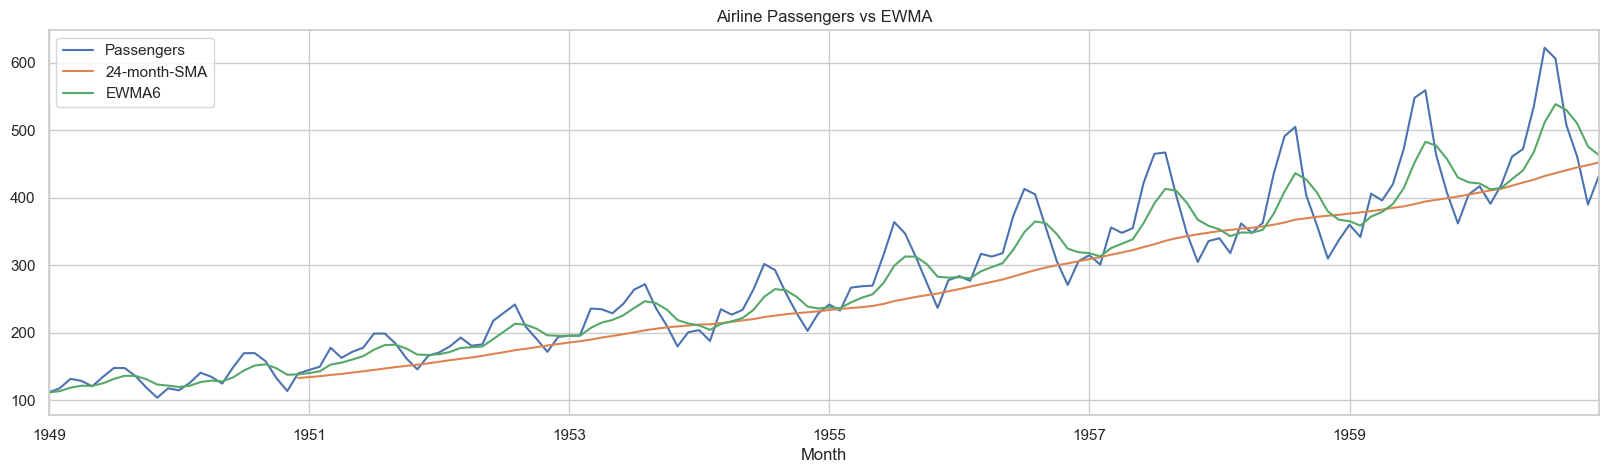

In [97]:
df_airline[['Passengers', '24-month-SMA', 'EWMA6']].plot(title='Airline Passengers vs EWMA', figsize=(20, 5))